In [1]:
import pandas as pd
import numpy as np

In [3]:
file_path = "Cardiotocographic.csv"   # change path if needed
df = pd.read_csv(file_path)

In [5]:
df
df.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,2.4,64.000000,0.999926,2.000000
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,10.4,130.000000,0.000000,1.000000
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,13.4,130.000000,0.000000,1.000000
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.000000,16.0,2.4,0.0,23.0,117.000000,1.000000,1.000000
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,19.9,117.000000,1.000000,1.000000
5,134.000000,0.001116,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,0.0,150.000000,0.000000,3.000000
6,134.000000,0.001403,0.0,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.0,0.0,150.000000,0.000000,-1.025988
7,122.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.0,15.6,69.920261,1.000000,3.000000
8,122.000000,0.038567,0.0,0.001517,0.000000,0.0,0.000000,84.0,0.5,5.0,13.6,68.000000,1.000000,3.000000
9,122.000000,0.000000,0.0,0.002967,0.000000,0.0,0.000000,86.0,0.3,6.0,10.6,68.000000,1.000000,3.000000


In [6]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [7]:
df = df.fillna(df.mean())

print("\n--- Missing Values After ---")
print(df.isnull().sum())


--- Missing Values After ---
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [8]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [11]:
print("\n--- Outliers Count ---")
print(outliers)


--- Outliers Count ---
LB           10
AC           43
FM          347
UC           13
DL          125
DS          141
DP          305
ASTV         10
MSTV         80
ALTV        318
MLTV         81
Width        10
Tendency     10
NSP         580
dtype: int64


In [12]:
df_removed = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nShape after removing outliers:", df_removed.shape)


Shape after removing outliers: (883, 14)


In [13]:
df_capped = df.copy()
for col in df.columns:
    lower_limit = Q1[col] - 1.5 * IQR[col]
    upper_limit = Q3[col] + 1.5 * IQR[col]
    df_capped[col] = np.where(df[col] < lower_limit, lower_limit,
                              np.where(df[col] > upper_limit, upper_limit, df[col]))
print("Shape after capping outliers:", df_capped.shape)

Shape after capping outliers: (2126, 14)


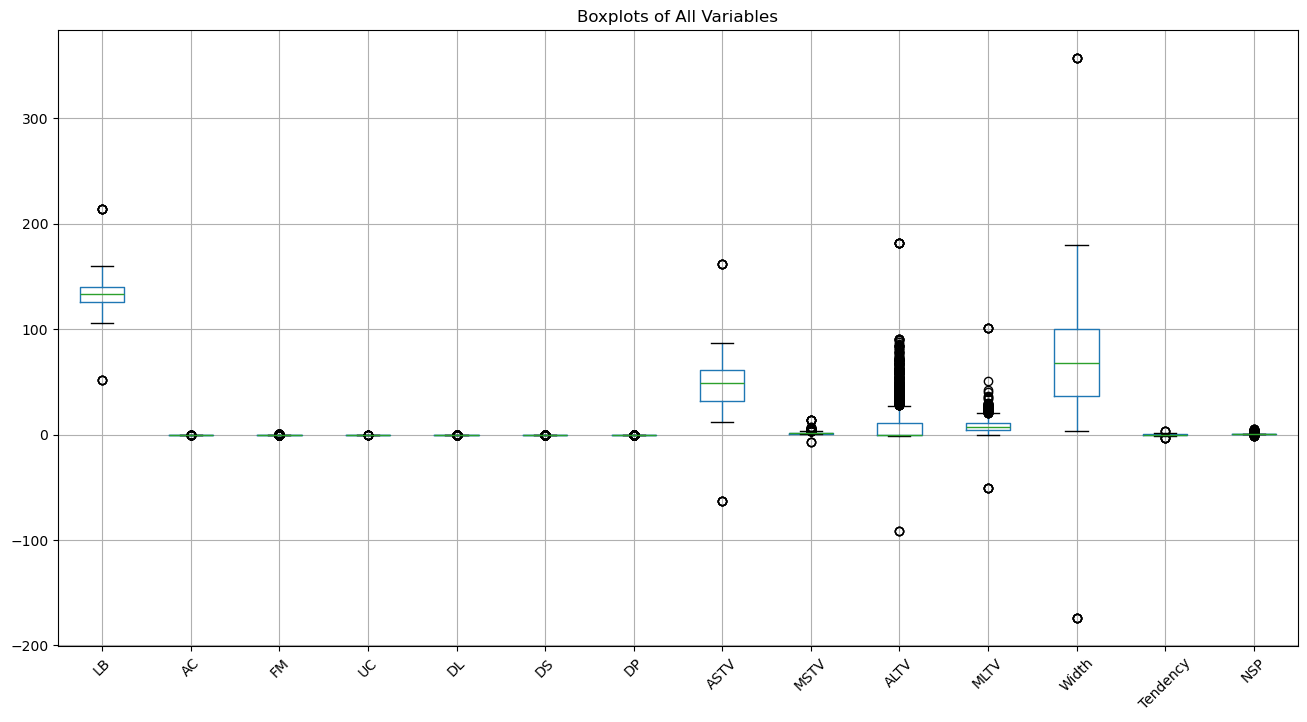

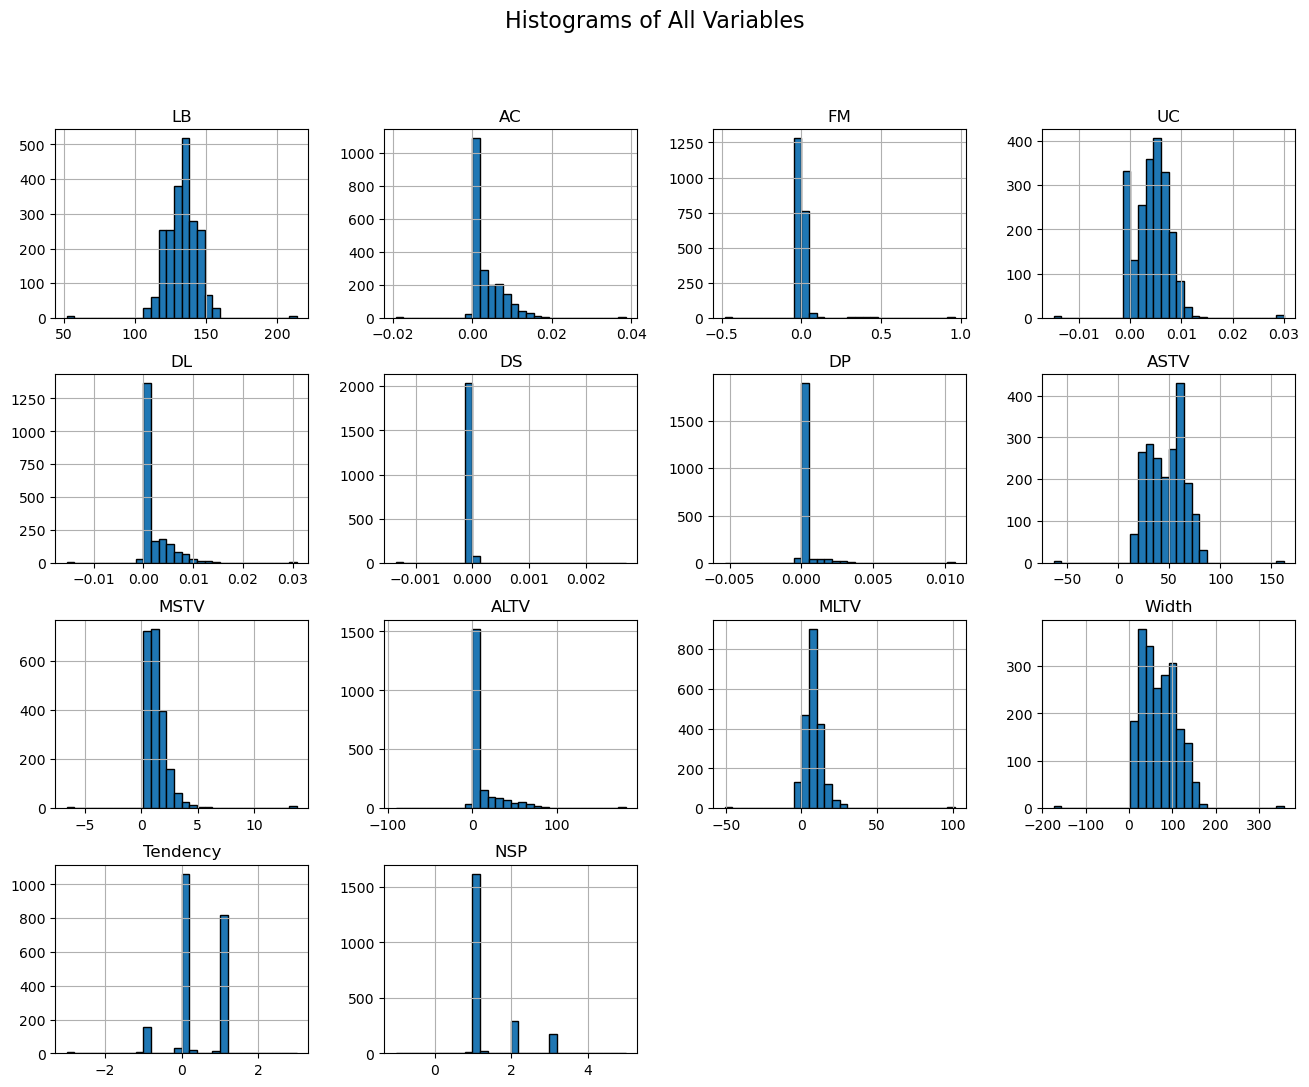

In [14]:
import matplotlib.pyplot as plt

# 📌 Boxplots for all variables
plt.figure(figsize=(16, 8))
df.boxplot(rot=45)
plt.title("Boxplots of All Variables")
plt.show()

# 📌 Histograms for each variable
df.hist(figsize=(16, 12), bins=30, edgecolor="black")
plt.suptitle("Histograms of All Variables", fontsize=16)
plt.show()


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

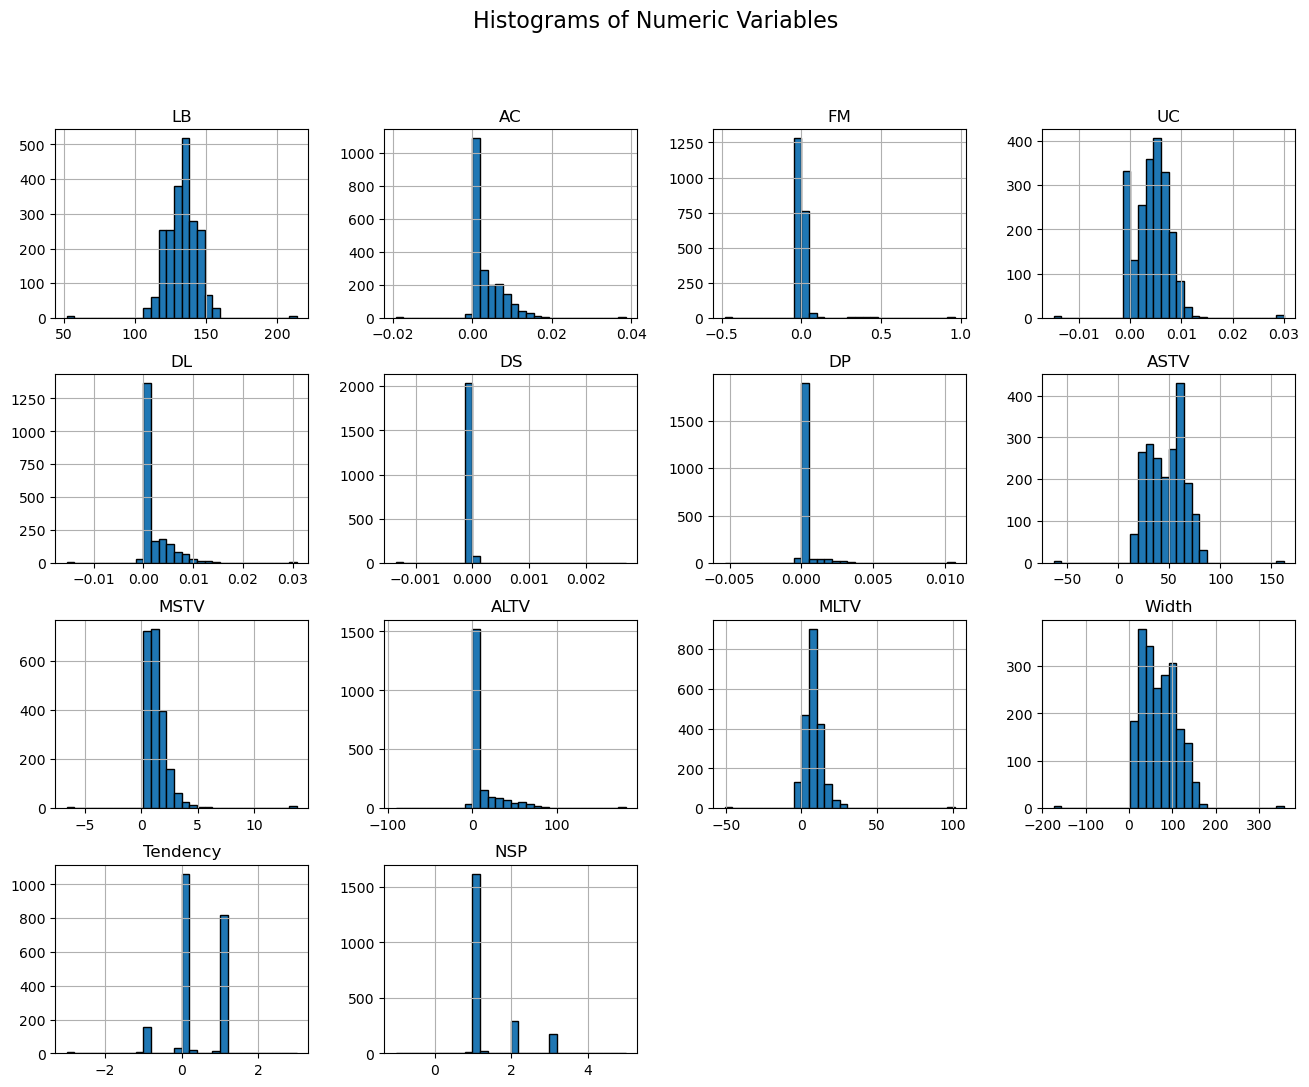

In [16]:
df.hist(figsize=(16, 12), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numeric Variables", fontsize=16)
plt.show()

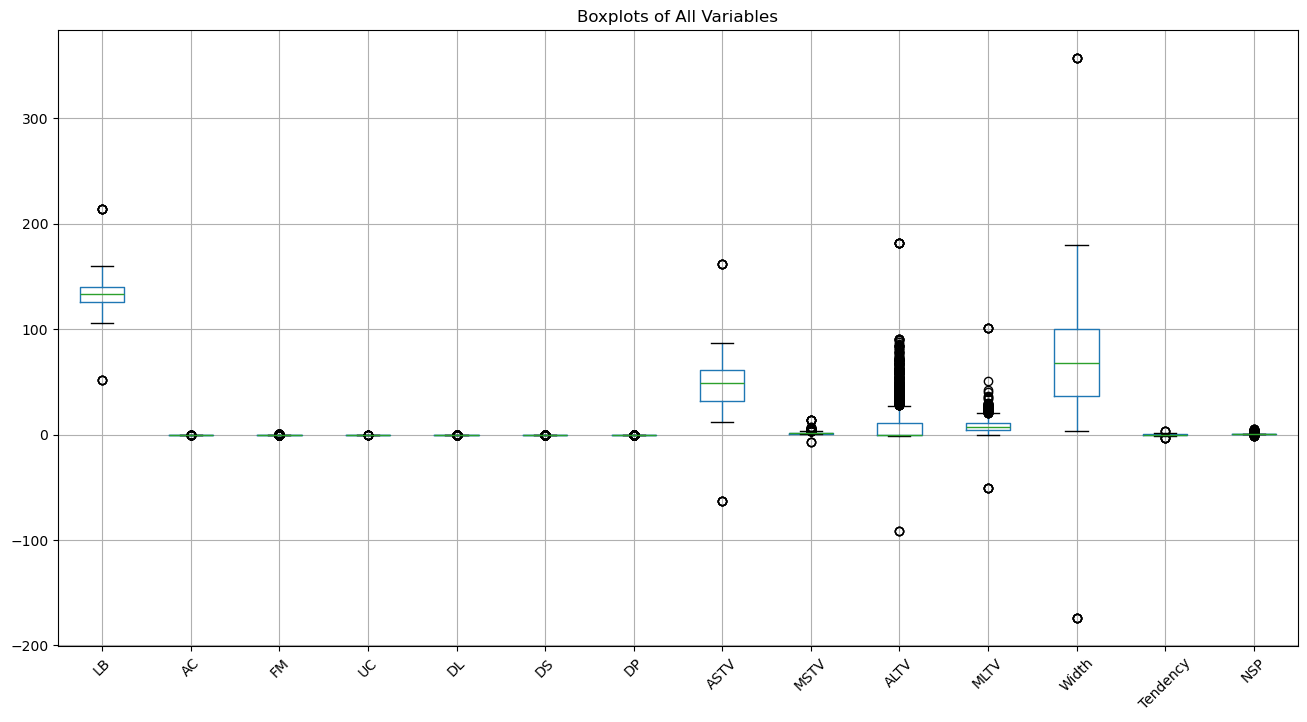

In [17]:
plt.figure(figsize=(16, 8))
df.boxplot(rot=45)
plt.title("Boxplots of All Variables")
plt.show()

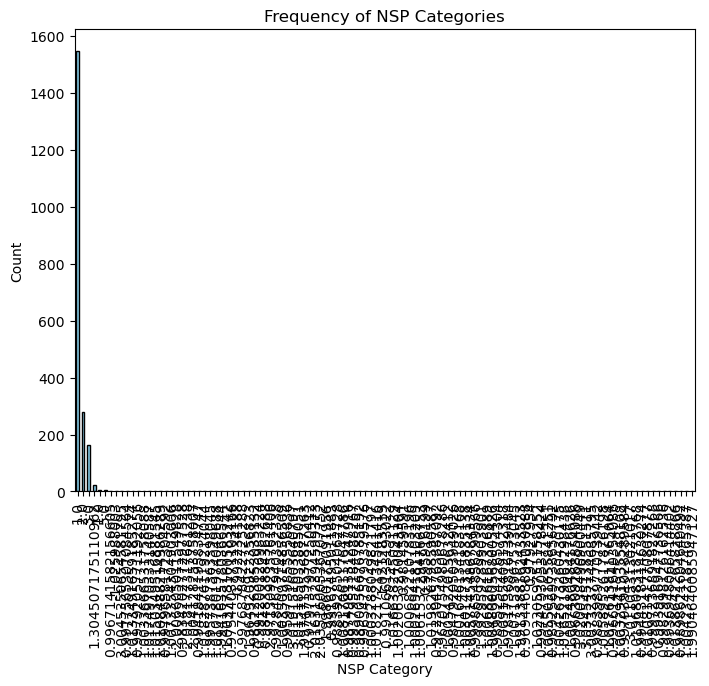

In [18]:
plt.figure(figsize=(8, 6))
df["NSP"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Frequency of NSP Categories")
plt.xlabel("NSP Category")
plt.ylabel("Count")
plt.show()

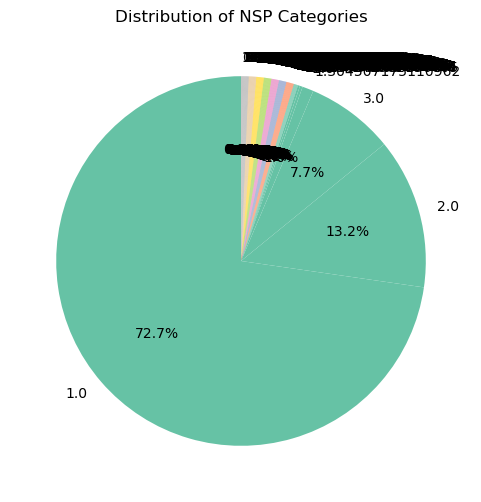

In [19]:
plt.figure(figsize=(6, 6))
df["NSP"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, cmap="Set2")
plt.title("Distribution of NSP Categories")
plt.ylabel("")
plt.show()

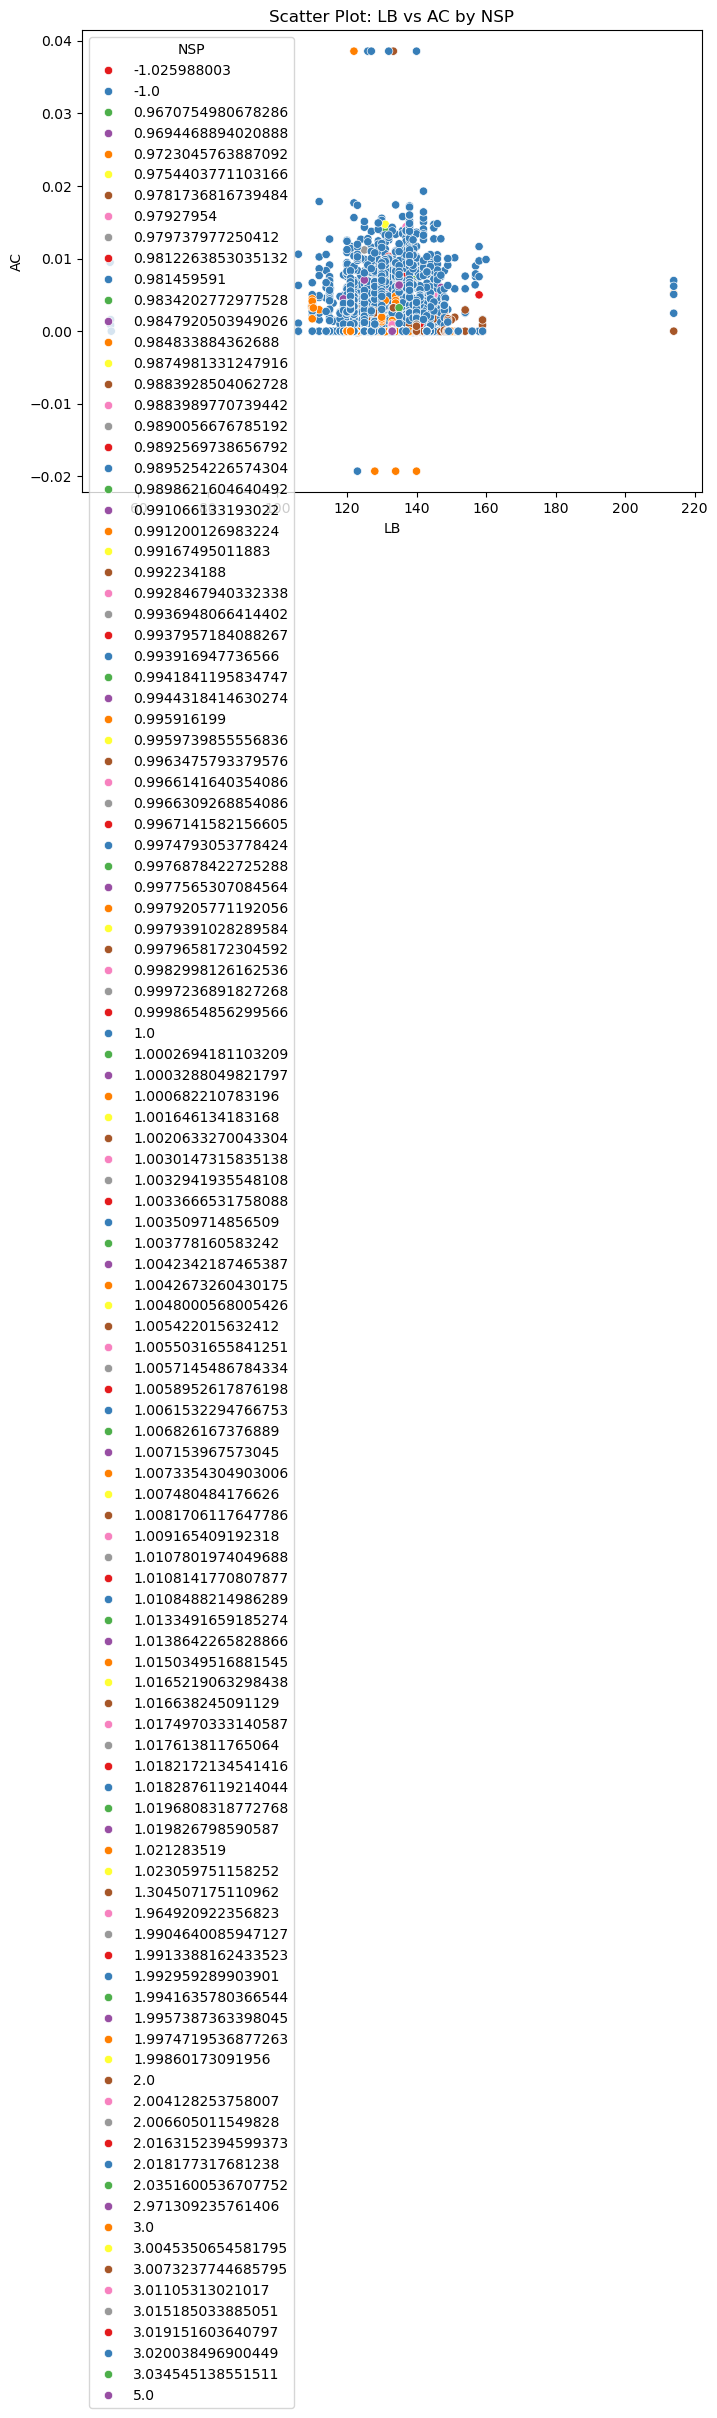

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="LB", y="AC", hue="NSP", data=df, palette="Set1")
plt.title("Scatter Plot: LB vs AC by NSP")
plt.show()

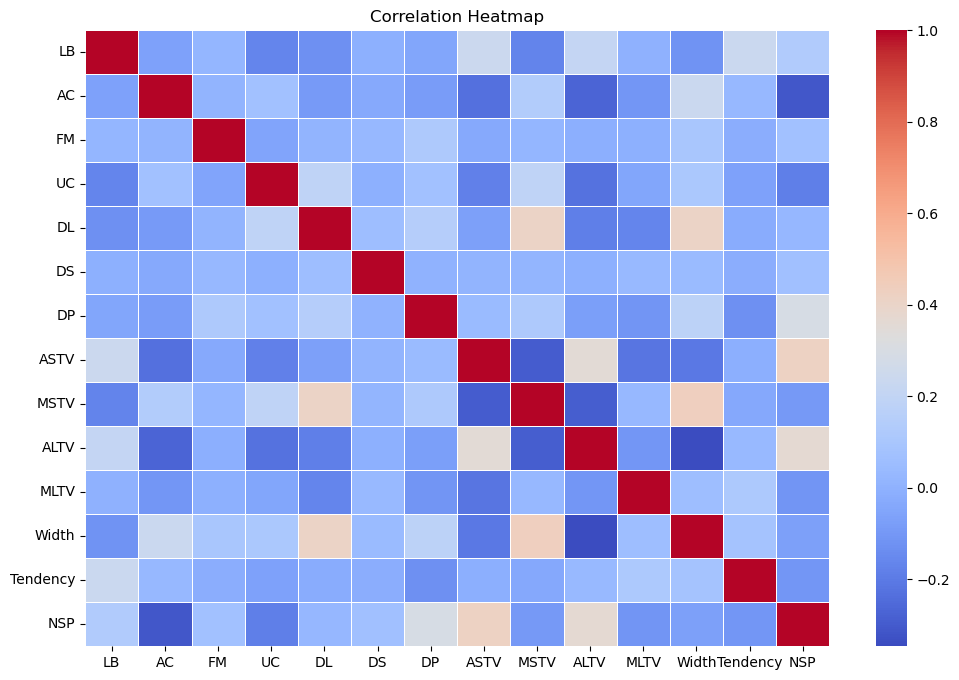

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

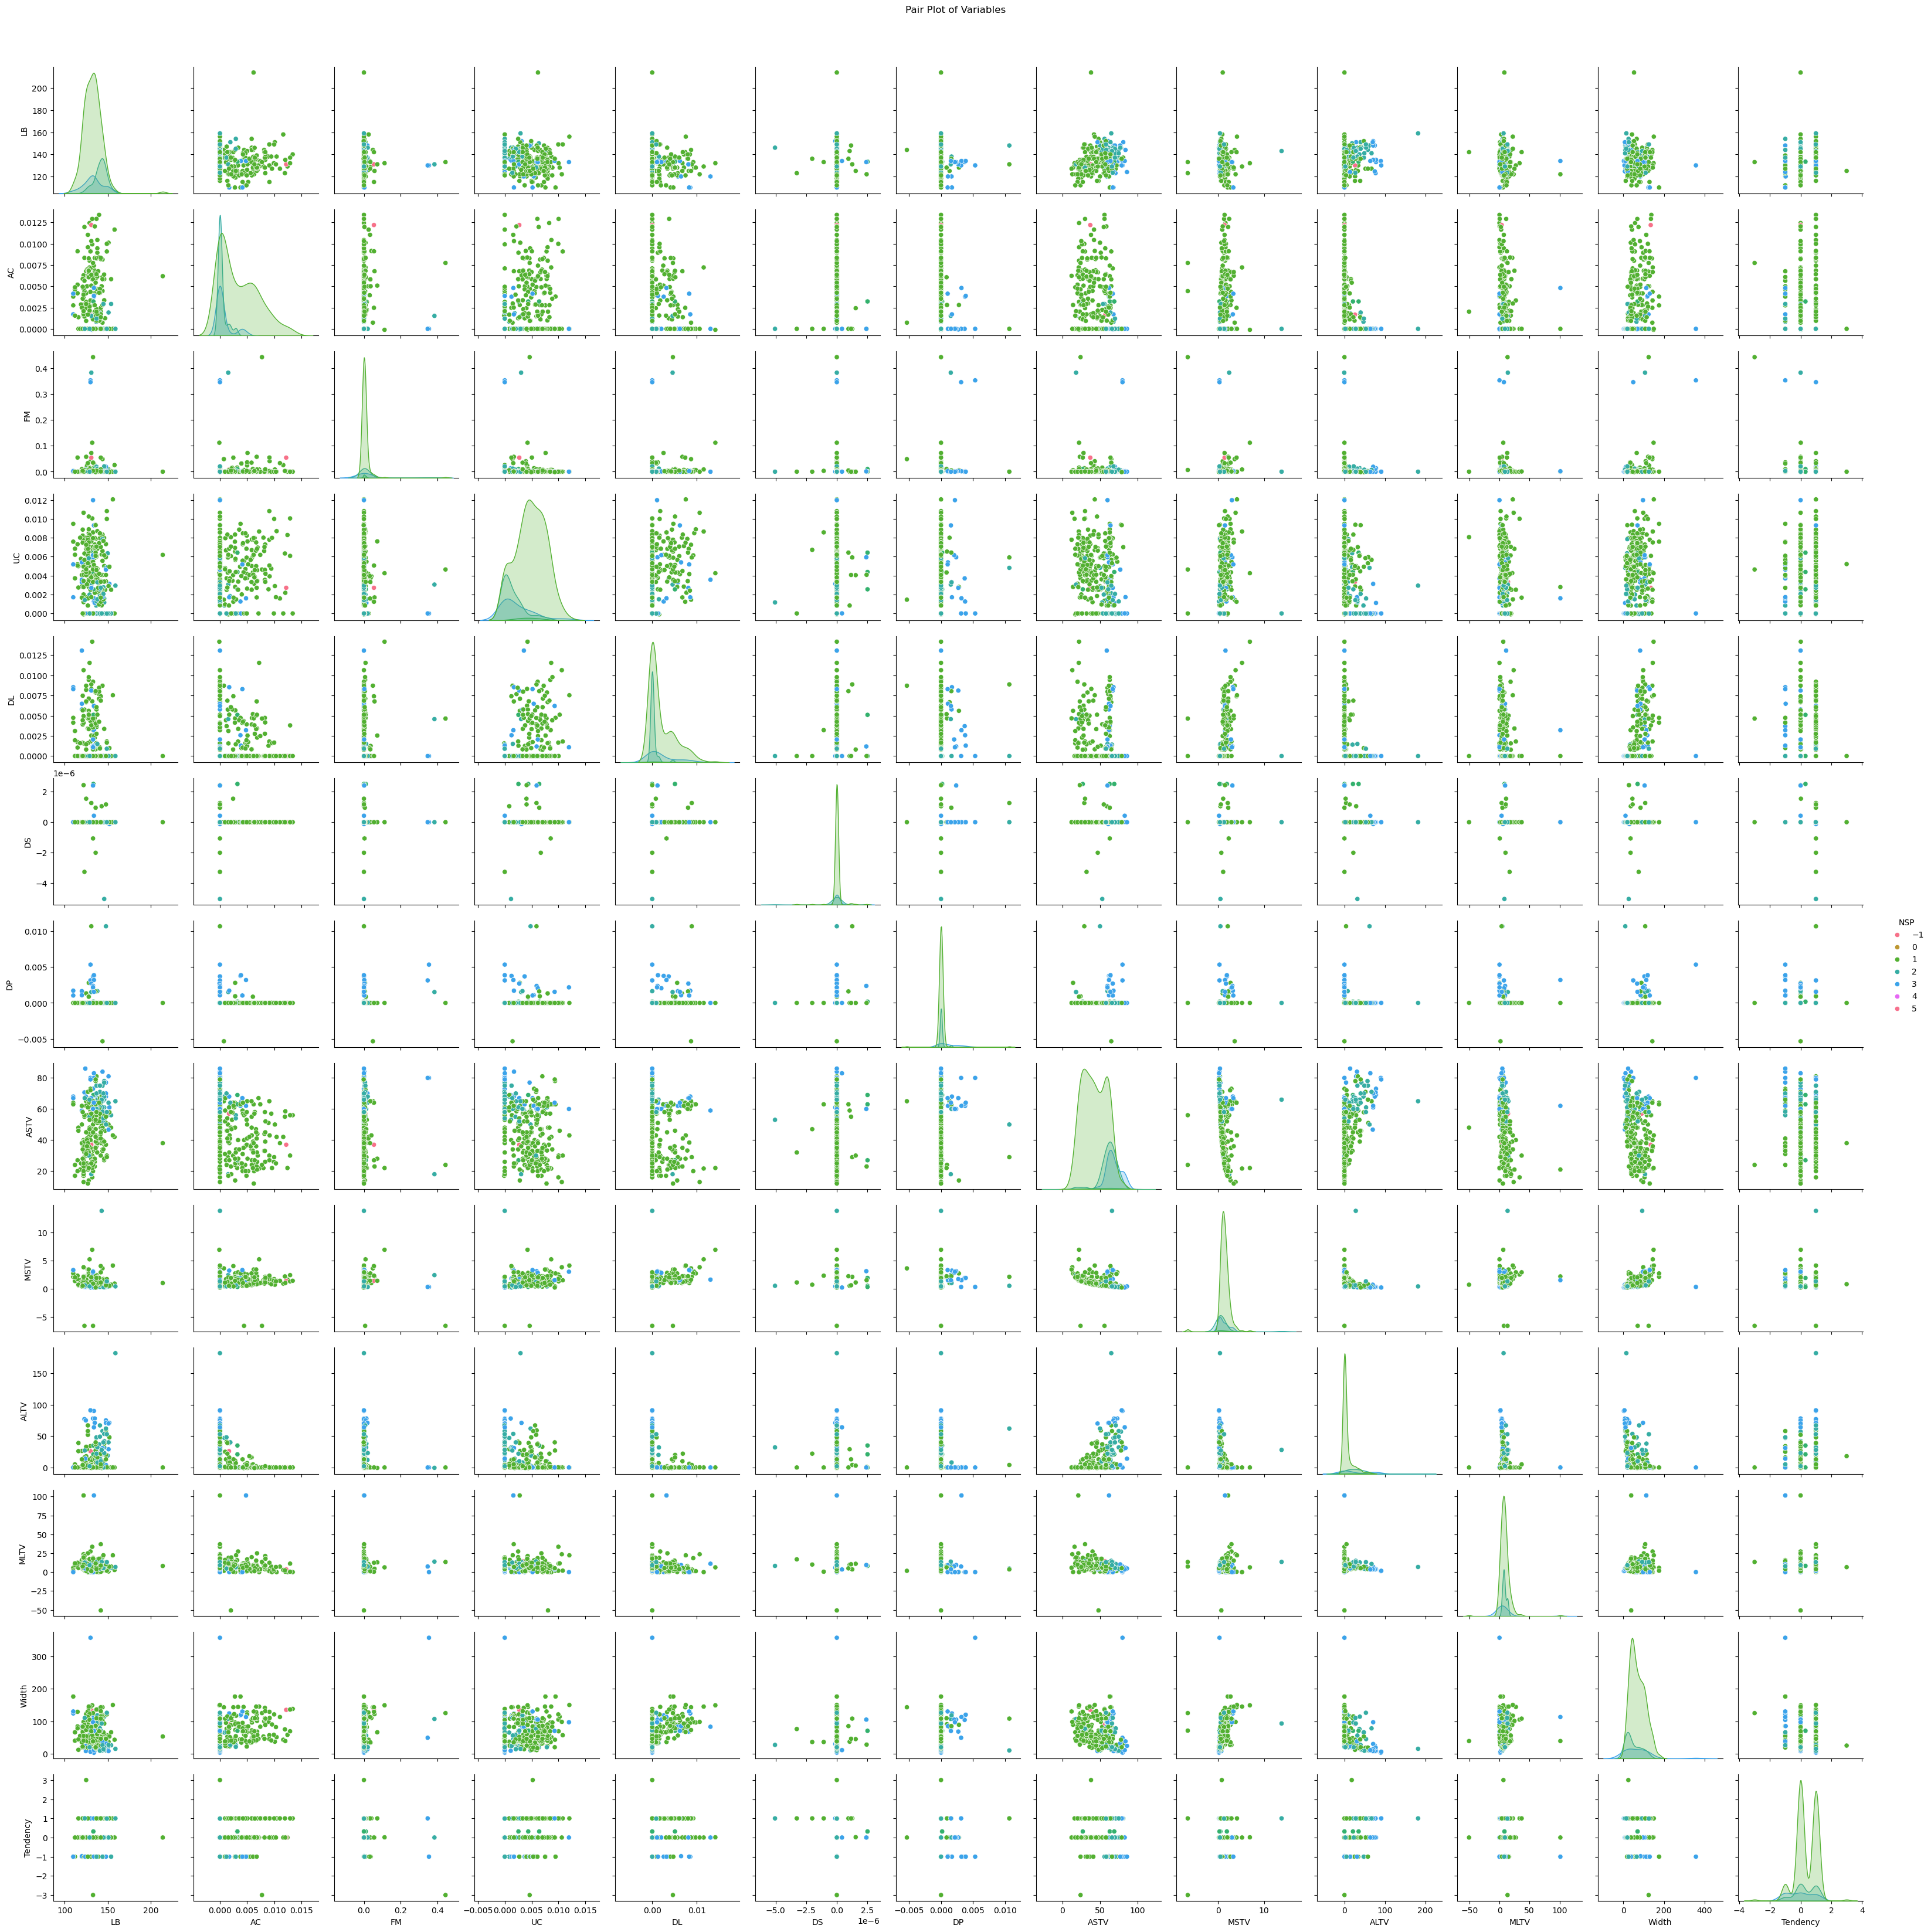

In [22]:
sns.pairplot(df.sample(300), hue="NSP", palette="husl")  # sample for speed
plt.suptitle("Pair Plot of Variables", y=1.02)
plt.show()

C:\Users\chandu\AppData\Local\Temp\ipykernel_15212\344888422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="NSP", y="LB", data=df, palette="Set2")


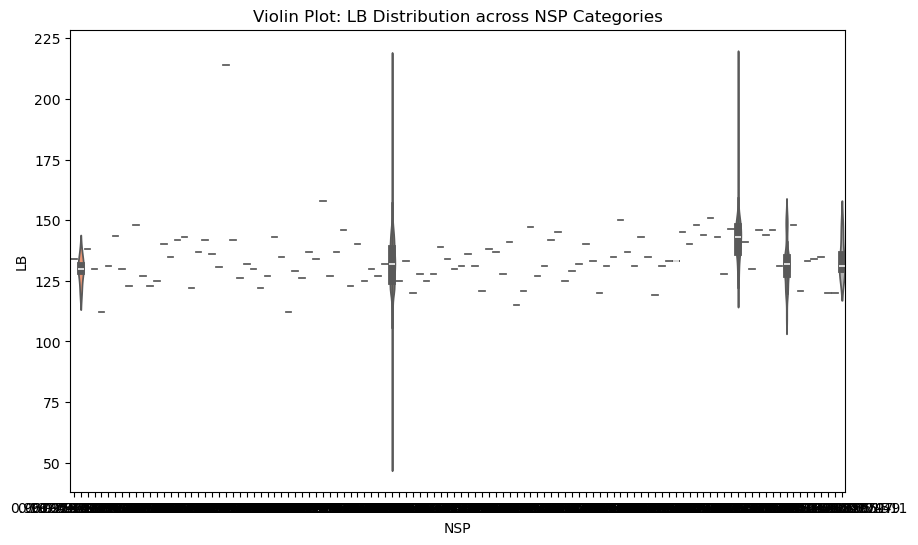

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="NSP", y="LB", data=df, palette="Set2")
plt.title("Violin Plot: LB Distribution across NSP Categories")
plt.show()
